In [14]:
#imports
import xarray as xr
import matplotlib.pyplot as plt
import oggm
from oggm import cfg, utils, workflow, tasks, graphics
from oggm.utils import get_demo_file, gettempdir
from oggm.core import gis
import geopandas as gpd
import rasterio as rio
import numpy as np
import os

cfg.initialize()
cfg.PARAMS['use_multiprocessing'] = True
cfg.PARAMS['use_rgi_area'] = False
cfg.PARAMS['use_intersects'] = False

cfg.PATHS['working_dir'] = utils.gettempdir(dirname='OGGM_ISSUE_TEST', reset=True)
base_dir = gettempdir('OGGM_ISSUE_TEST')

2021-11-01 15:25:57: oggm.cfg: Reading default parameters from the OGGM `params.cfg` configuration file.
2021-11-01 15:25:57: oggm.cfg: Multiprocessing switched OFF according to the parameter file.
2021-11-01 15:25:57: oggm.cfg: Multiprocessing: using all available processors (N=8)
2021-11-01 15:25:57: oggm.cfg: Multiprocessing switched ON after user settings.
2021-11-01 15:25:57: oggm.cfg: PARAMS['use_rgi_area'] changed from `True` to `False`.
2021-11-01 15:25:57: oggm.cfg: PARAMS['use_intersects'] changed from `True` to `False`.


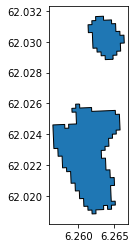

In [20]:
#read user provided shape file
gdf = gpd.read_file('/Users/georgecowie/Documents/Jobb/NVE/flowlines/BreF_1999_2006/selection.shp')
#convert to WGS84 to be sure
gdf = gdf.to_crs("EPSG:4326")

gdf.plot(ec='k');


In [21]:
#Convert a glacier inventory into a dataset looking like the RGI (OGGM ready).
cook_gdf = utils.cook_rgidf(gdf, o1_region='8')
gdirs = workflow.init_glacier_directories(cook_gdf)

2021-11-01 15:37:36: oggm.workflow: Execute entity task GlacierDirectory on 2 glaciers


In [22]:
#select single glacier: Nigardsbreen
gdir = gdirs[0]

In [26]:
cfg.PATHS['dem_file'] = ('/Users/georgecowie/Documents/Jobb/NVE/flowlines/dtm10/data/dtm10_6900_3_10m_z33.tif') #path to custom dem
tasks.define_glacier_region(gdirs[0], source='USER')
print(gdir.dem_info)#



2021-11-01 15:39:26: oggm.core.gis: (RGI60-8.00001) define_glacier_region


USER

# Data files

dtm10_6900_3_10m_z33.tif



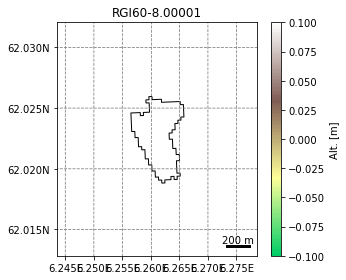

In [27]:
graphics.plot_domain(gdir)